In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'AAPL'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2012-01-03,12.359184,12.397354,12.292164,12.304186,302220800
1,2012-01-04,12.425602,12.462870,12.300577,12.322216,260022000
2,2012-01-05,12.563552,12.579180,12.402461,12.470985,271269600
3,2012-01-06,12.694889,12.705408,12.599317,12.615847,318292800
4,2012-01-09,12.674751,12.855678,12.663330,12.788056,394024400
...,...,...,...,...,...,...
2756,2022-12-14,141.378662,144.784541,139.354874,143.491296,82291200
2757,2022-12-15,134.754425,139.986651,134.290434,139.305473,98931900
2758,2022-12-16,132.789902,135.889747,132.019877,134.942032,160156900


In [5]:
ma_100_days = data.Close.rolling(100).mean()

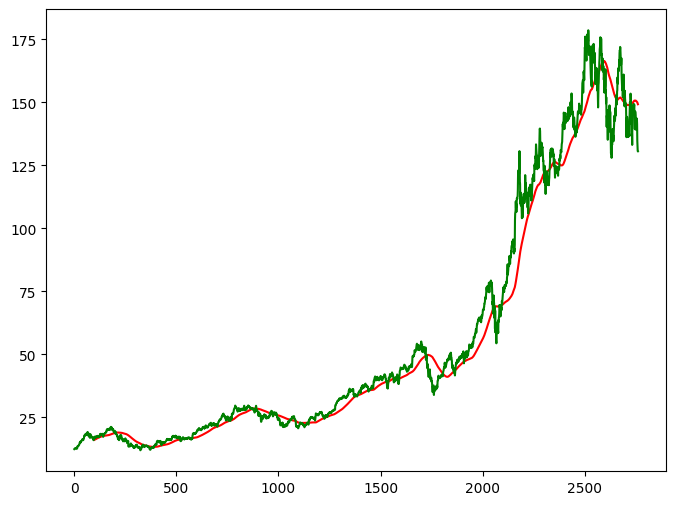

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

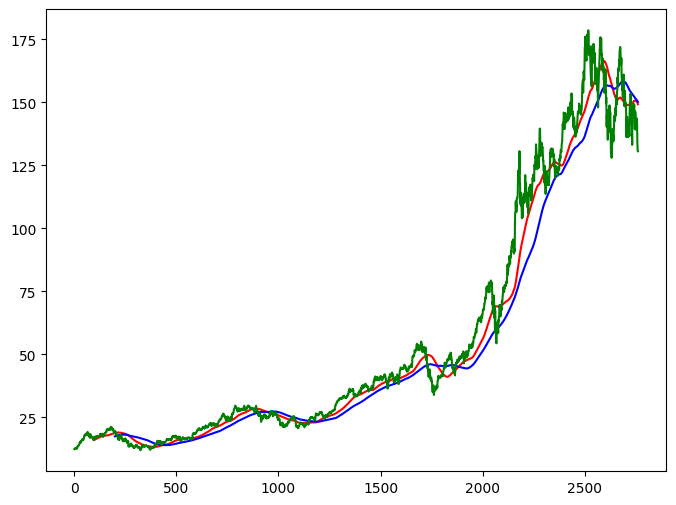

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
!pip install tensorflow

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\Varsha.p\My_Projects\MINI_PROJECT\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - loss: 0.0298
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - loss: 0.0044
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - loss: 0.0028
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - loss: 0.0027
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - loss: 0.0028
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - loss: 0.0021
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - loss: 0.0018
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 236ms/step - loss: 0.0028
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - loss: 0.0028
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - loss: 0.0017
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - loss: 0.0016
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 238ms/step - loss: 0.0022
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - loss: 0.0019
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - loss: 0.0020
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

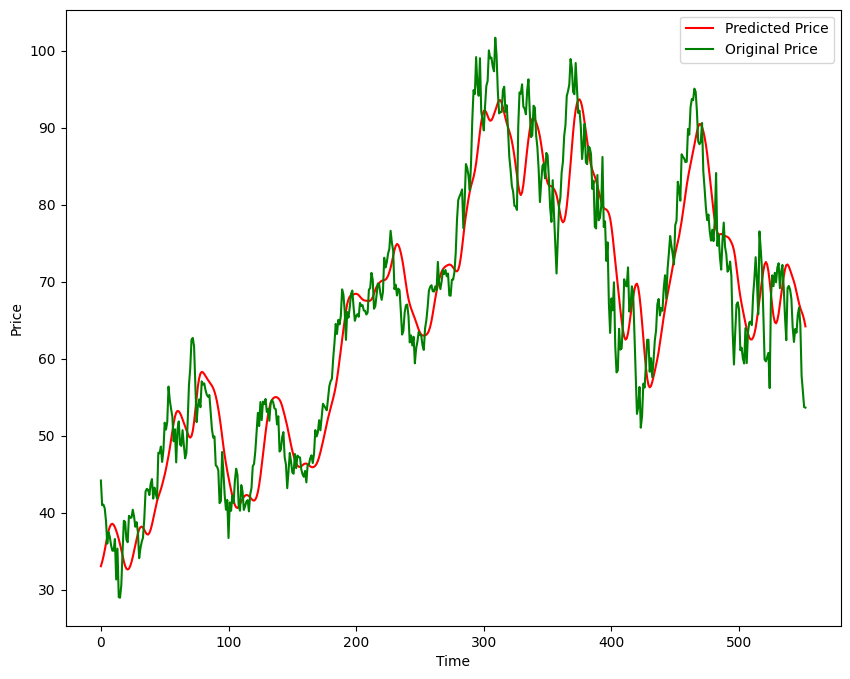

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')